## Predict historical prices of Brent Oil, Crude Oil WTI, Natural Gas, Heating Oil from 2000-2022 with Fedot.Industrial

Dataset published on Kaggle3 consists of historical prices of Brent Oil, CrudeOil WTI, Natural Gas, and Heating Oil from 2000 to 2022. This sample of DailyOilGasPrices was created by using 30 consecutive business days of **Crude Oil WTI close prices** and **traded volumes** as **predictors** and the **average natural gas close** price during each 30-day time frame as the **target** variable. The final dataset has 191 2-dimensional time series of length 30, of which 70% were randomly sampled as training data and the remaining 30% as testing data. This type of model could help companies and governments to better analyse and predict economic situations and correlations regarding oil and natural gas.
Link to the dataset - https://www.kaggl.com/datasets/prasertk/historical-daily-oil-and-natural-gas-prices

In [1]:
# strategy='forecasting_assumptions',
# strategy_params={
#         'industrial_task': 'ts_forecasting',
#         'data_type': 'time_series'}
strategy = None
strategy_params = {}

In [2]:
import pandas as pd
from fedot_ind.api.utils.path_lib import PROJECT_PATH

forecast_params = {'forecast_length': 12}
metric_names = ('smape', 'rmse', 'median_absolute_error')
finetune = False
api_config = dict(
    problem='ts_forecasting',
    metric='rmse',
    timeout=5,
    with_tuning=False,
    industrial_strategy=strategy,
    industrial_strategy_params=strategy_params,
    task_params=forecast_params,
    logging_level=20)

In [3]:
dataset_name = PROJECT_PATH +'/examples/data/forecasting\monash_benchmark\MonashBitcoin_30.csv'
train_data = pd.read_csv(dataset_name)

In [4]:
from fedot_ind.core.architecture.pipelines.abstract_pipeline import ApiTemplate
api_client = ApiTemplate(api_config=api_config,
                         metric_list=metric_names)

In [5]:
train_data

,datetime,value,label
0,2009-01-03,1.0,difficulty
1,2009-01-04,1.0,difficulty
2,2009-01-05,1.0,difficulty
3,2009-01-06,1.0,difficulty
4,2009-01-07,1.0,difficulty
...,...,...,...
82453,2021-07-15,32109.0,price
82454,2021-07-16,31750.0,price
82455,2021-07-17,31556.0,price
82456,2021-07-18,31763.0,price


Now we must download the dataset. It could be done by using `DataReader` class that implemented as attribute of `FedotIndustrial` class. This class firstly tries to read the data from local project folder `data_path` and then if it is not possible, it downloads the data from the UCR/UEA archive. The data will be saved in the `data` folder.

In [6]:
id_list = train_data['label'].unique().tolist()
data_split = {id:train_data[train_data['label']==id]['value'].values for id in id_list}

In [7]:
features = data_split['price']
target = data_split['price'][-12:]

In [8]:
dataset_dict = dict(train_data=(features,target),
                    test_data=(features,target))

Lets visualise our predictors.

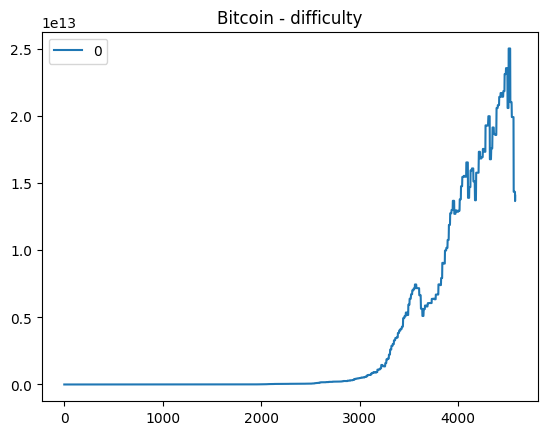

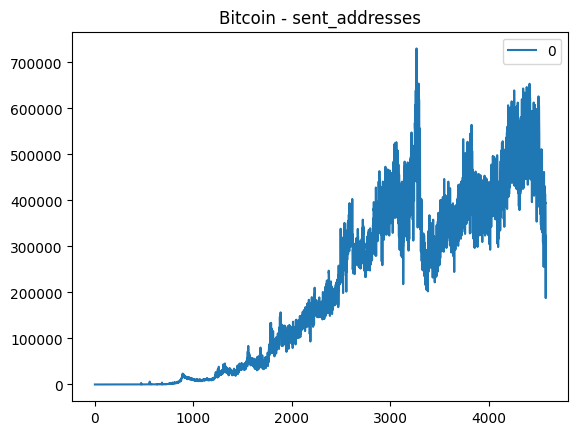

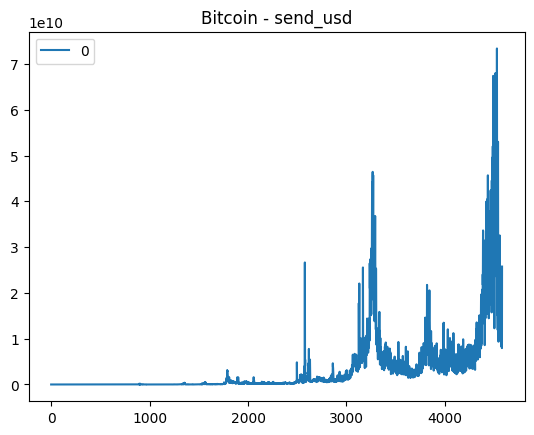

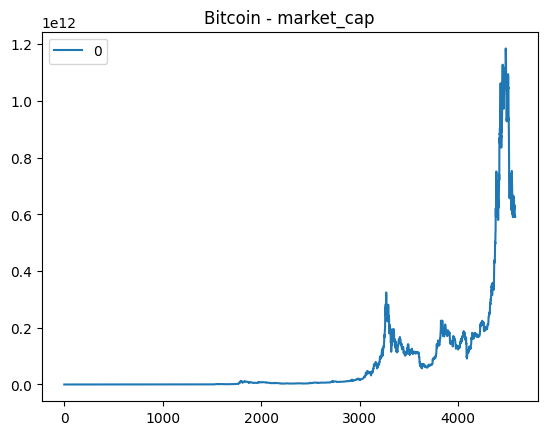

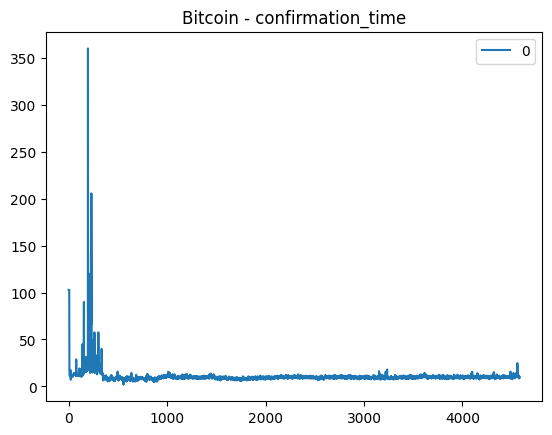

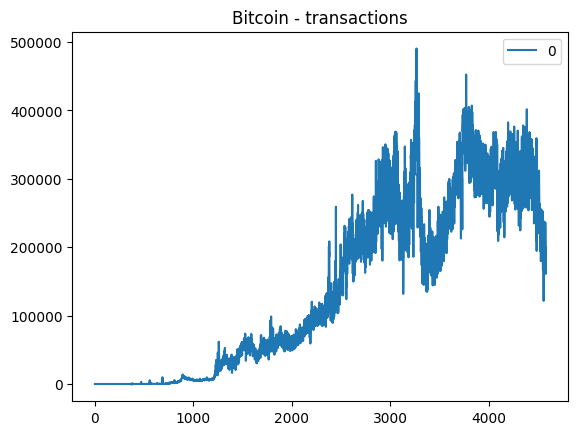

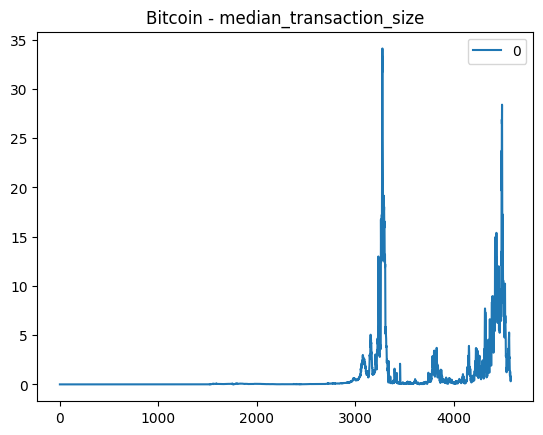

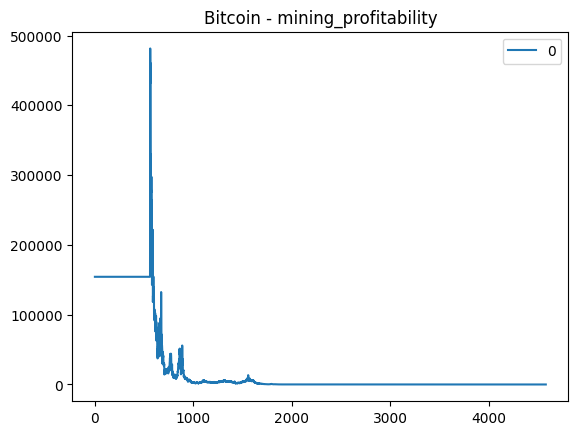

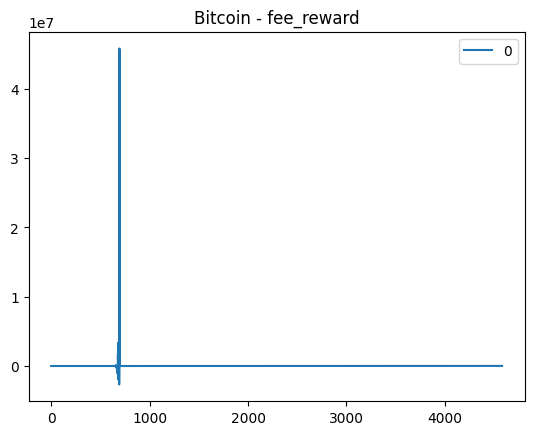

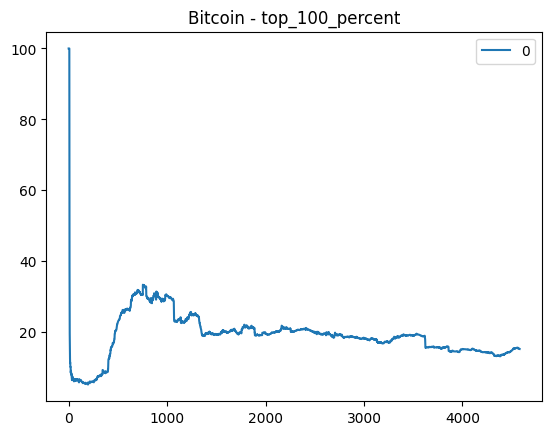

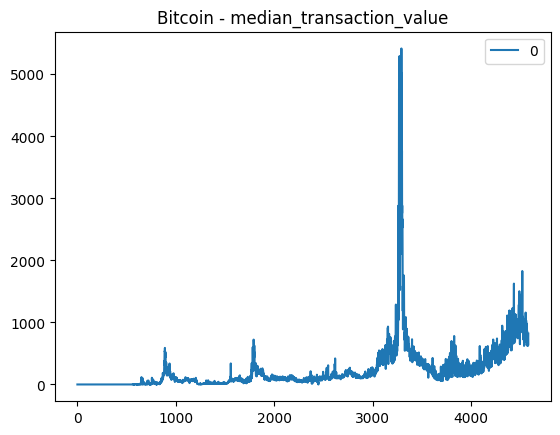

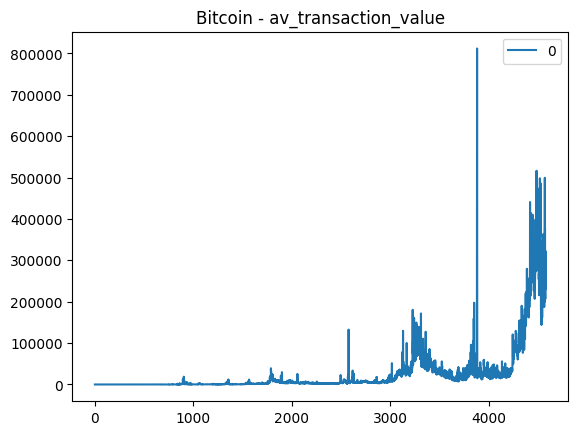

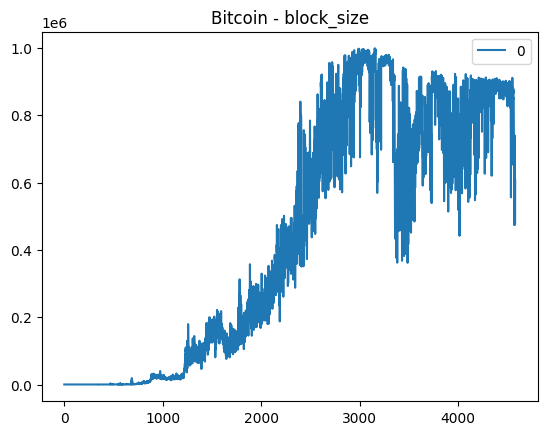

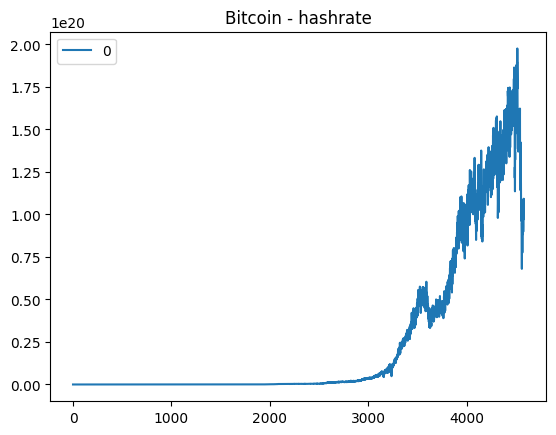

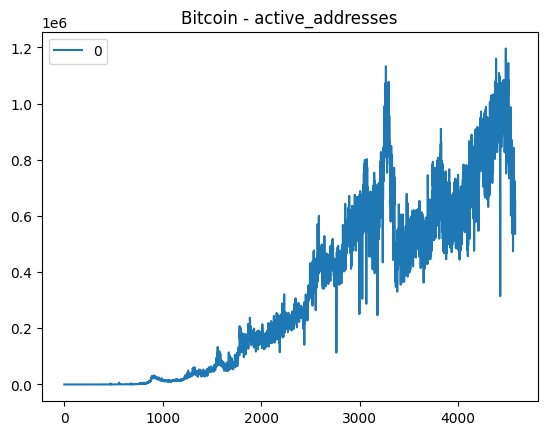

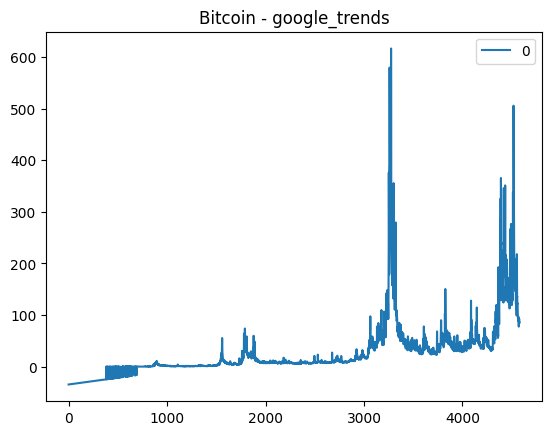

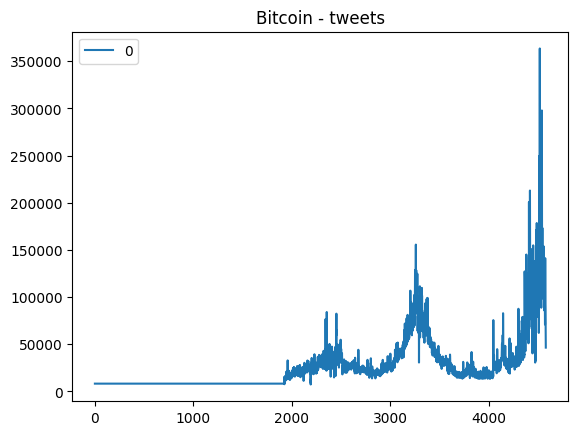

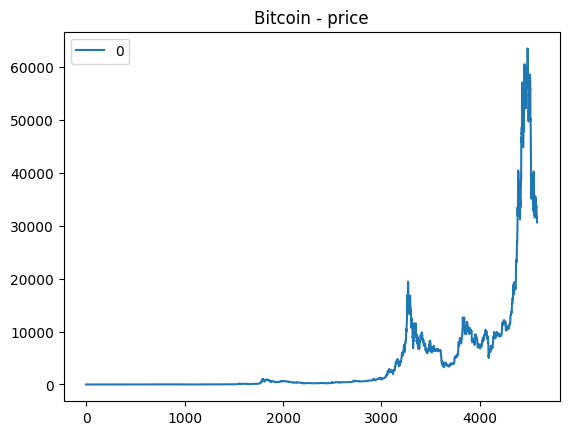

In [9]:
from matplotlib import pyplot as plt
for ts_type in data_split.keys():
    pd.DataFrame(data_split[ts_type]).plot(title=f'Bitcoin - {ts_type}')
    plt.show()

Next steps are quite straightforward. We need to fit the model and then predict the values for the test data just like for any other model in sklearn.

At the `fit` stage FedotIndustrial will transform initial time series data into features dataframe and will train regression model.

In [10]:
result_dict = api_client.eval(dataset=dataset_dict)

Creating Dask Server
2024-07-09 17:12:34,706 - To route to workers diagnostics web server please install jupyter-server-proxy: python -m pip install jupyter-server-proxy
2024-07-09 17:12:34,711 - State start
2024-07-09 17:12:36,216 -   Scheduler at: inproc://10.64.4.227/29756/1
2024-07-09 17:12:36,217 -   dashboard at:  http://10.64.4.227:59247/status
2024-07-09 17:12:36,218 - Registering Worker plugin shuffle
2024-07-09 17:12:37,725 -       Start worker at: inproc://10.64.4.227/29756/4
2024-07-09 17:12:37,726 -          Listening to:          inproc10.64.4.227
2024-07-09 17:12:37,727 -           Worker name:                          0
2024-07-09 17:12:37,728 -          dashboard at:          10.64.4.227:59254
2024-07-09 17:12:37,728 - Waiting to connect to: inproc://10.64.4.227/29756/1
2024-07-09 17:12:37,729 - -------------------------------------------------
2024-07-09 17:12:37,729 -               Threads:                          8
2024-07-09 17:12:37,729 -                Memory:  

Generations:   0%|          | 0/10000 [00:00<?, ?gen/s]

IndustrialDispatcher - Number of used CPU's: 8
IndustrialDispatcher - 5 individuals out of 21 in previous population were evaluated successfully. 0.23809523809523808% is a fairly small percentage of successful evaluation.2024-07-09 17:36:26,871 - Event loop was unresponsive in Scheduler for 5.88s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.

2024-07-09 17:36:26,915 - Event loop was unresponsive in Worker for 5.92s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
IndustrialEvoOptimizer - Generation num: 1 size: 5
IndustrialEvoOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=1246.720 node_number=0.200>']
GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 0/10000 [23:49<?, ?gen/s]

OptimisationTimer - Composition time: 23.818 min
OptimisationTimer - Algorithm was terminated due to processing time limit
IndustrialEvoOptimizer - Generation num: 2 size: 1
IndustrialEvoOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=1246.720 node_number=0.200>']
IndustrialEvoOptimizer - no improvements for 1 iterations
IndustrialEvoOptimizer - spent time: 23.8 min
GPComposer - GP composition finished
ApiComposer - Model generation finished


FEDOT logger - Final pipeline was fitted
FEDOT logger - Final pipeline: {'depth': 2, 'length': 2, 'nodes': [ar, gaussian_filter]}
ar - {'lag_1': 7, 'lag_2': 12}
gaussian_filter - {}
MemoryAnalytics - Memory consumption for finish in main session: current 5.7 MiB, max: 5559.2 MiB
FEDOT logger - Predictions was saved in current directory.


In [12]:
result_dict['metrics']

,rmse,median_absolute_error,smape
0,1608.678,1013.587,3.913


In [13]:
result_dict['labels']

array([32437.03949022, 31997.90439634, 31533.11755573, 31122.93960368,
       30816.61851064, 30641.68580802, 30626.55629426, 32460.46802395,
       31962.32195237, 31405.26381303, 30900.92195609, 30506.71642145])

In [14]:
import numpy as np
from matplotlib import pyplot as plt
border = 500
eigen = result_dict['labels']
plt.close()
real_values = features
if len(real_values) > border:
    real_values = real_values[-border:]
indicies = np.arange(real_values.shape[0])

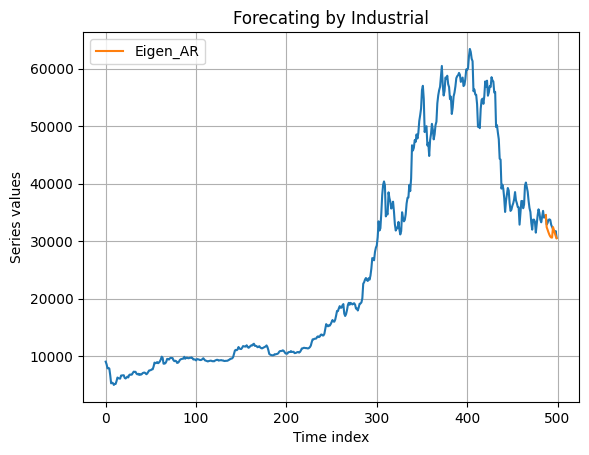

In [15]:
horizon = forecast_params['forecast_length']
plt.xlabel('Time index')
plt.ylabel('Series values')
plt.title('Forecating by Industrial')
plt.plot(real_values)

real_last_value = real_values[-horizon- 1]
plt.plot(indicies[-horizon- 1:],
         np.insert(eigen, 0, real_last_value), label='Eigen_AR')

plt.grid()
plt.legend()